In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, PercentFormatter)
import numpy as np
pd.set_option('display.max_rows', 50)

In [2]:
kalandra = pd.read_csv("Currency/Kalandra.currency.csv", sep = ";")
sentinel = pd.read_csv("Currency/Sentinel.currency.csv", sep = ";")
archnemesis = pd.read_csv("Currency/Archnemesis.currency.csv", sep = ";")
scourge = pd.read_csv("Currency/Scourge.currency.csv", sep = ";")

expedition = pd.read_csv("Currency/Expedition.currency.csv", sep = ";")
# ultimatum = pd.read_csv("Currency/Ultimatum.currency.csv", sep = ";")
# ritual = pd.read_csv("Currency/Ritual.currency.csv", sep = ";")

In [3]:
kalandra_tailoringOrb = kalandra.loc[kalandra['Get']=='Tailoring Orb']
sentinel_tailoringOrb = sentinel.loc[sentinel['Get']=='Tailoring Orb']
archnemesis_tailoringOrb = archnemesis.loc[archnemesis['Get']=='Tailoring Orb']
scourge_tailoringOrb = scourge.loc[scourge['Get']=='Tailoring Orb']

expedition_tailoringOrb = expedition.loc[expedition['Get']=='Tailoring Orb']
# ultimatum_tailoringOrb = ultimatum.loc[ultimatum['Get']=='Tailoring Orb']
# ritual_tailoringOrb = ritual.loc[ritual['Get']=='Tailoring Orb']


# kalandra_tailoringOrb = kalandra_tailoringOrb[kalandra_tailoringOrb.Value < 250000]
# kalandra_tailoringOrb = kalandra_tailoringOrb[kalandra_tailoringOrb.Value > 1000]


In [4]:
kalandra_newID = kalandra_tailoringOrb.copy()
sentinel_newID = sentinel_tailoringOrb.copy()
archnemesis_newID = archnemesis_tailoringOrb.copy()
scourge_newID = scourge_tailoringOrb.copy()

expedition_newID = expedition_tailoringOrb.copy()
# ultimatum_newID = ultimatum_tailoringOrb.copy()
# ritual_newID = ritual_tailoringOrb.copy()


In [5]:
kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

C:\Users\65978\AppData\Local\Temp\ipykernel_7248\3681828452.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


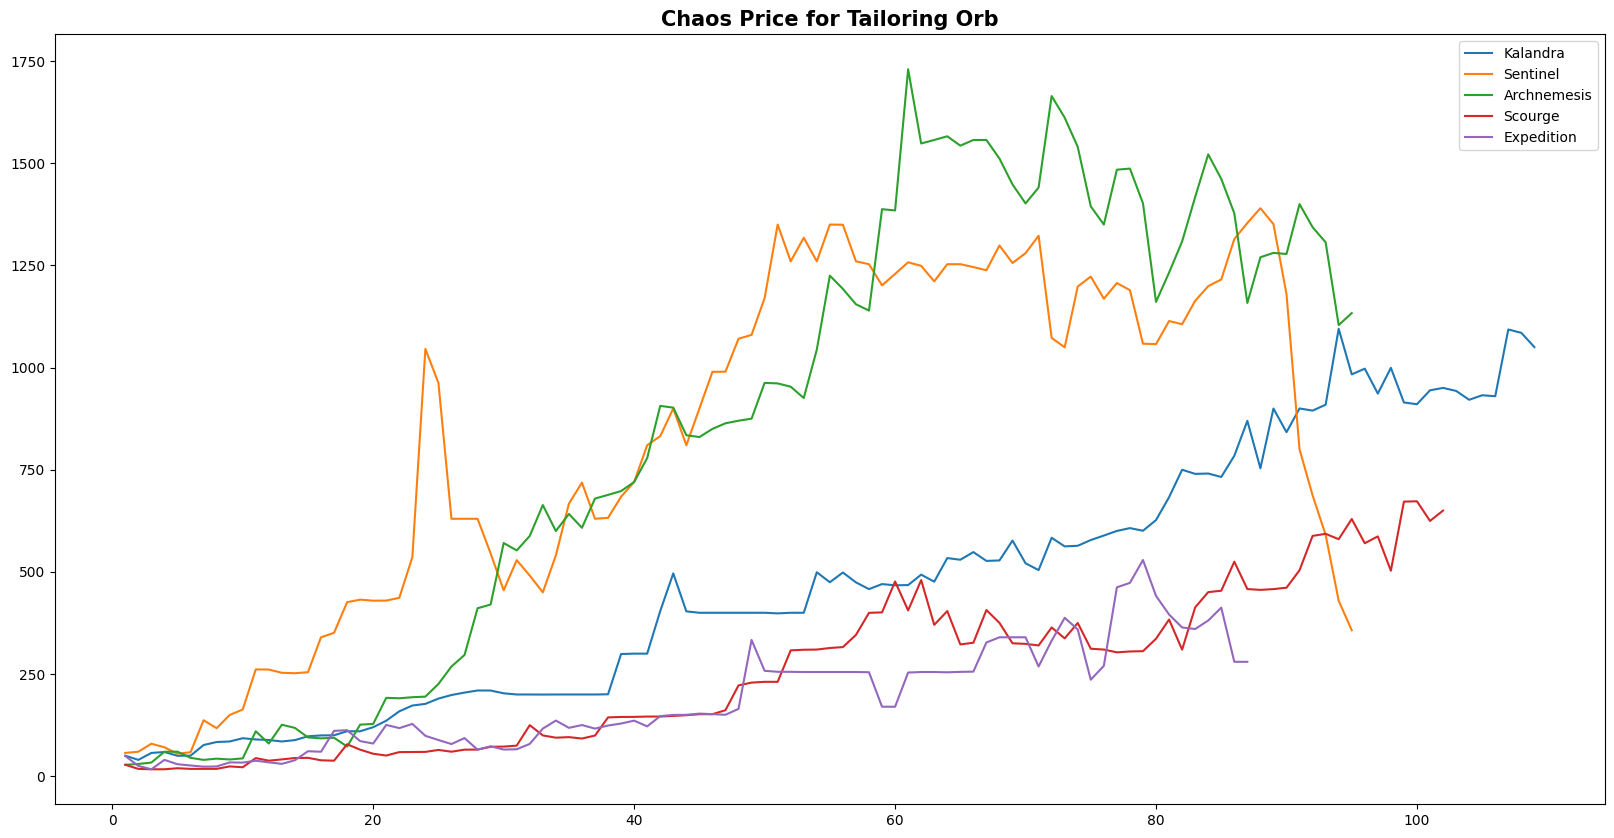

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Tailoring Orb', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()

In [7]:
kalandra_Ref1stDay = kalandra_tailoringOrb.copy()
sentinel_Ref1stDay = sentinel_tailoringOrb.copy()
archnemesis_Ref1stDay = archnemesis_tailoringOrb.copy()
scourge_Ref1stDay = scourge_tailoringOrb.copy()

expedition_Ref1stDay = expedition_tailoringOrb.copy()
# ultimatum_Ref1stDay = ultimatum_tailoringOrb.copy()
# ritual_Ref1stDay = ritual_tailoringOrb.copy()

In [8]:
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

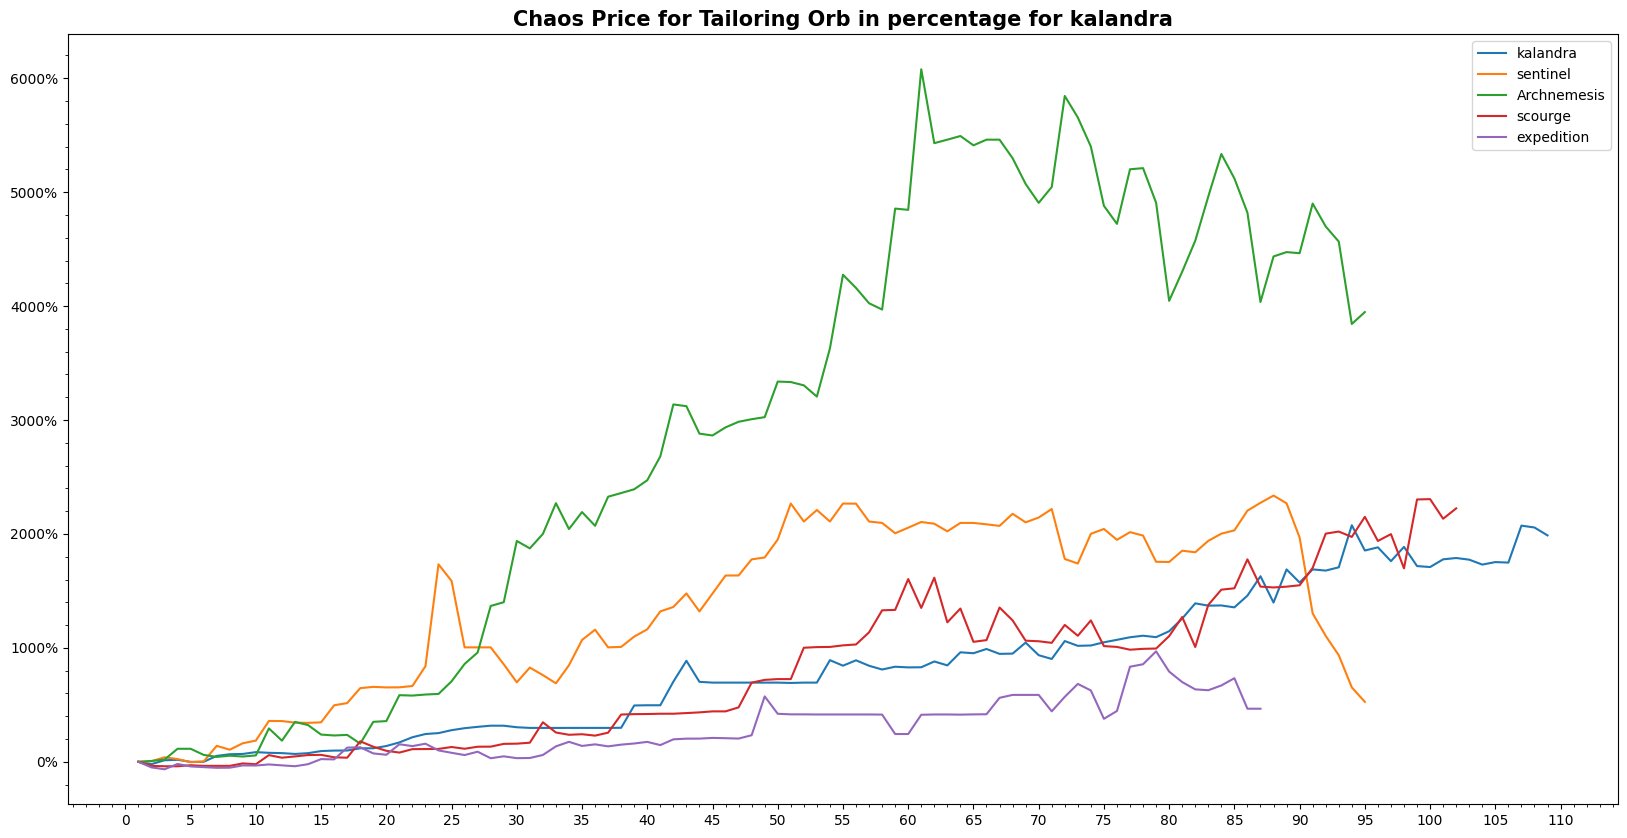

In [9]:

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Tailoring Orb in percentage for kalandra', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()
